In [126]:
from bs4 import BeautifulSoup
import urllib.parse
import pandas as pd
from datetime import datetime,timedelta
import numpy as np

In [127]:
start = '2021-01-01'
end = '2021-03-31'
start = datetime.strptime(start, "%Y-%m-%d").date()
end = datetime.strptime(end, "%Y-%m-%d").date()
type(end)

datetime.date

In [128]:
time_period = [start+timedelta(days=x) for x in range(1000) if start+timedelta(days=x)<=end]

In [129]:
df_buy = pd.DataFrame()
df_sell = pd.DataFrame()
for i in time_period:
    url = 'http://vip.stock.finance.sina.com.cn/q/view/vFutures_Positions_cjcc.php?t_breed=J2109&t_date='+str(i)
    data = pd.read_html(url)
    db = data[3]   # 3为多单持仓   4为空单持仓
    if len(db)>1:
        db.set_index('会员简称',inplace = True)
        db = db['多单持仓']
        db.name = i
        df_buy = pd.concat([df_buy, db], axis=1)
    ds = data[4]   # 3为多单持仓   4为空单持仓
    if len(ds)>1:
        ds.set_index('会员简称',inplace = True)
        ds = ds['空单持仓']
        ds.name = i
        df_sell = pd.concat([df_sell, ds], axis=1)
df_buy,df_sell

(      2021-02-05  2021-02-09  2021-02-10  2021-02-18  2021-02-19  2021-02-22  \
 永安期货       926.0       898.0       880.0      1082.0      1256.0      1352.0   
 鲁证期货       704.0       773.0       770.0      1085.0      1084.0      1224.0   
 国盛期货       683.0       678.0       678.0       503.0         NaN         NaN   
 华泰期货       605.0       595.0       575.0       676.0       657.0       888.0   
 一德期货       527.0       451.0       508.0       668.0       741.0       732.0   
 国泰君安       484.0       568.0       594.0       695.0       718.0       969.0   
 瑞达期货       353.0       340.0       339.0       540.0       541.0       563.0   
 东海期货       352.0       296.0       247.0       301.0       376.0       333.0   
 东证期货       333.0       449.0       228.0      1179.0       248.0      1570.0   
 中辉期货       332.0       383.0       387.0       377.0       454.0       496.0   
 神华期货       270.0       270.0       266.0       266.0       258.0         NaN   
 招商期货       254.0       284.

In [130]:
df_buy.sort_index(inplace = True)
df_buy

,2021-02-05,2021-02-09,2021-02-10,2021-02-18,2021-02-19,2021-02-22,2021-02-23,2021-02-24,2021-02-25,2021-02-26,...,2021-03-18,2021-03-19,2021-03-22,2021-03-23,2021-03-24,2021-03-25,2021-03-26,2021-03-29,2021-03-30,2021-03-31
一德期货,527.0,451.0,508.0,668.0,741.0,732.0,694.0,700.0,701.0,706.0,...,1390.0,1043.0,1026.0,1432.0,2331.0,1131.0,1179.0,1239.0,1376.0,1561.0
上海中期,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,232.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
东海期货,352.0,296.0,247.0,301.0,376.0,333.0,320.0,381.0,260.0,NaN,...,2299.0,2271.0,4956.0,4954.0,4846.0,4959.0,4910.0,4824.0,2418.0,2952.0
东航期货,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,512.0,504.0,523.0,511.0,NaN,NaN,507.0,NaN,NaN,NaN
东证期货,333.0,449.0,228.0,1179.0,248.0,1570.0,559.0,1310.0,1360.0,424.0,...,1578.0,3497.0,4511.0,1154.0,4411.0,1745.0,3785.0,3340.0,2397.0,4831.0
中信建投,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,512.0,512.0,595.0,726.0,816.0,1013.0,1170.0,1212.0
中信期货,118.0,NaN,NaN,191.0,193.0,306.0,414.0,356.0,493.0,420.0,...,690.0,686.0,680.0,718.0,719.0,729.0,1060.0,989.0,1169.0,1203.0
中粮期货,NaN,152.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
中衍期货,NaN,NaN,NaN,NaN,NaN,213.0,208.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
中财期货,246.0,284.0,394.0,458.0,524.0,698.0,860.0,813.0,901.0,934.0,...,1077.0,1086.0,1009.0,1017.0,1036.0,1035.0,1068.0,1075.0,1073.0,1172.0


In [131]:
df_buy = df_buy.drop(df_buy.index[-1], axis=0)
df_buy.replace(np.nan,0)

,2021-02-05,2021-02-09,2021-02-10,2021-02-18,2021-02-19,2021-02-22,2021-02-23,2021-02-24,2021-02-25,2021-02-26,...,2021-03-18,2021-03-19,2021-03-22,2021-03-23,2021-03-24,2021-03-25,2021-03-26,2021-03-29,2021-03-30,2021-03-31
一德期货,527.0,451.0,508.0,668.0,741.0,732.0,694.0,700.0,701.0,706.0,...,1390.0,1043.0,1026.0,1432.0,2331.0,1131.0,1179.0,1239.0,1376.0,1561.0
上海中期,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,232.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
东海期货,352.0,296.0,247.0,301.0,376.0,333.0,320.0,381.0,260.0,0.0,...,2299.0,2271.0,4956.0,4954.0,4846.0,4959.0,4910.0,4824.0,2418.0,2952.0
东航期货,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,512.0,504.0,523.0,511.0,0.0,0.0,507.0,0.0,0.0,0.0
东证期货,333.0,449.0,228.0,1179.0,248.0,1570.0,559.0,1310.0,1360.0,424.0,...,1578.0,3497.0,4511.0,1154.0,4411.0,1745.0,3785.0,3340.0,2397.0,4831.0
中信建投,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,512.0,512.0,595.0,726.0,816.0,1013.0,1170.0,1212.0
中信期货,118.0,0.0,0.0,191.0,193.0,306.0,414.0,356.0,493.0,420.0,...,690.0,686.0,680.0,718.0,719.0,729.0,1060.0,989.0,1169.0,1203.0
中粮期货,0.0,152.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
中衍期货,0.0,0.0,0.0,0.0,0.0,213.0,208.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
中财期货,246.0,284.0,394.0,458.0,524.0,698.0,860.0,813.0,901.0,934.0,...,1077.0,1086.0,1009.0,1017.0,1036.0,1035.0,1068.0,1075.0,1073.0,1172.0


<AxesSubplot:>

c:\users\17218\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 19968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\17218\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 24503 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\17218\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\17218\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 36135 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\17218\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 19978 missing from current font.
  font.set_text(s

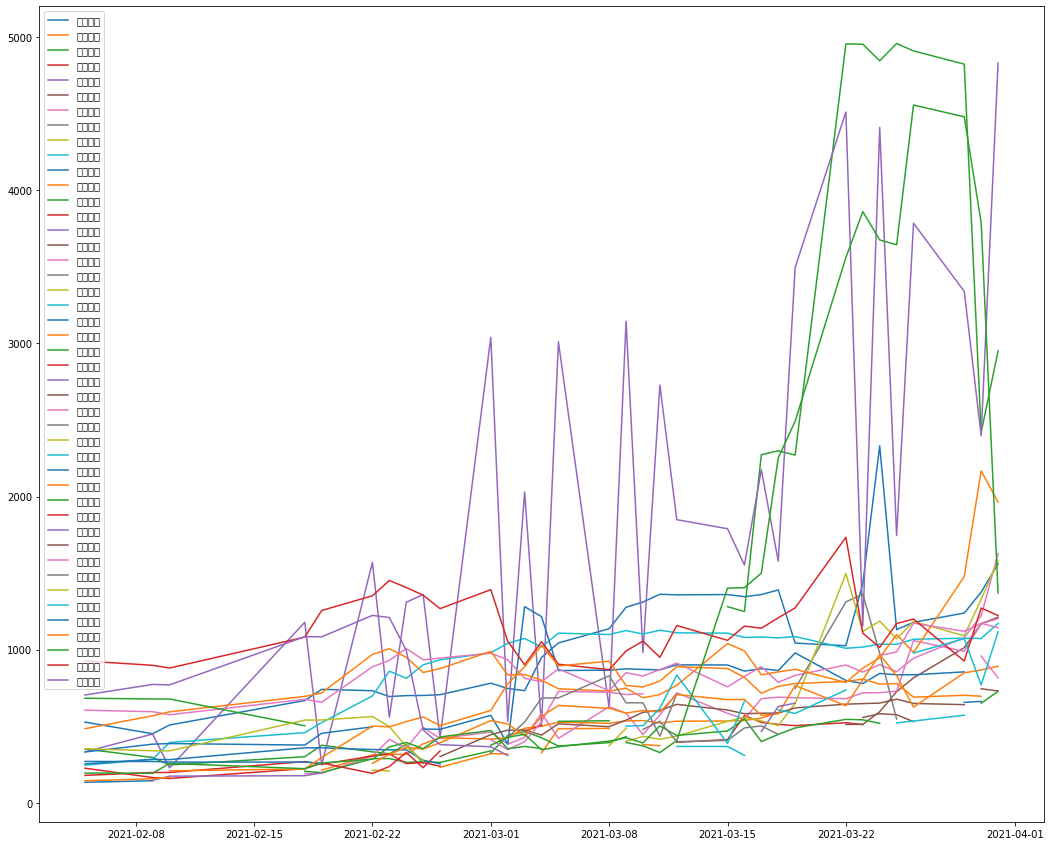

In [132]:
df_buy.T.plot(figsize=(18,15))